## Useful Functions ##

In [ ]:
import scipy
import scipy.sparse as sparse
import scipy.sparse.linalg as spalin
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt


def gen_s0sxsysz(L):
    sx = sparse.csr_matrix([[0., 1.],[1., 0.]])
    sy = sparse.csr_matrix([[0.,-1j],[1j,0.]])
    sz = sparse.csr_matrix([[1., 0],[0, -1.]])
    s0_list =[]
    sx_list = []
    sy_list = []
    sz_list = []
    I = sparse.eye(2**L, format='csr', dtype='complex')
    for i_site in range(L):
        if i_site==0:
            X=sx
            Y=sy
            Z=sz
        else:
            X= sparse.csr_matrix(np.eye(2))
            Y= sparse.csr_matrix(np.eye(2))
            Z= sparse.csr_matrix(np.eye(2))

        for j_site in range(1,L):
            if j_site==i_site:
                X=sparse.kron(X,sx, 'csr')
                Y=sparse.kron(Y,sy, 'csr')
                Z=sparse.kron(Z,sz, 'csr')
            else:
                X=sparse.kron(X,np.eye(2),'csr')
                Y=sparse.kron(Y,np.eye(2),'csr')
                Z=sparse.kron(Z,np.eye(2),'csr')
        sx_list.append(X)
        sy_list.append(Y)
        sz_list.append(Z)
        s0_list.append(I)

    return s0_list, sx_list,sy_list,sz_list


def gen_op_total(op_list):
    L = len(op_list)
    tot = op_list[0]
    for i in range(1,L):
        tot = tot + op_list[i]
    return tot

def gen_op_prod(op_list):
    L= len(op_list)
    P = op_list[0]
    for i in range(1, L):
        P = P*op_list[i]
    return P

def gen_interaction_kdist(op_list, op_list2=[],k=1, bc='obc'):
    L= len(op_list)

    if op_list2 ==[]:
        op_list2=op_list
    H = sparse.csr_matrix(op_list[0].shape)
    Lmax = L if bc == 'pbc' else L-k
    for i in range(Lmax):
        H = H+ op_list[i]*op_list2[np.mod(i+k,L)]
    return H

def gen_state_bloch(thetaList, phiList):
    L=len(thetaList)
    psi = np.kron([np.cos(thetaList[0]/2.),np.exp(1j*phiList[0])*np.sin(thetaList[0]/2.)],
                  [np.cos(thetaList[1]/2.),np.exp(1j*phiList[1])*np.sin(thetaList[1]/2.)])
    for i in range(2,L):
        psi = np.kron(psi, [np.cos(thetaList[i]/2.),np.exp(1j*phiList[i])*np.sin(thetaList[i]/2.)])
    return psi

## Question 1: Random Matrices  [25 pts] ##

A longstanding problem in quantum dynamics involves finding quantum analogs of classical concepts such as “chaos” and “ergodicity”. In classical dynamical systems, non-linear equations of motion can lead to chaotic trajectories that ergodically explore all of phase space. In this context, chaos means that trajectories display an exquisite sensitivity so that small differences in initial conditions get amplified in time exponentially at a rate set by a ‘Lyapunov exponent’ $\lambda$ – a manifestation of the so-called ‘butterfly effect’.

In contrast, quantum systems are governed by Schrodinger’s equation, which is linear, and hence cannot give rise to the kind of chaotic dynamics responsible for classical ergodicity. Under unitary evolution, the ‘distance’ between different time-evolving wavefunctions (measured, for instance, via the overlap) remains constant in time. Thus, new measures are needed to characterize chaos. One such measure that has been used to great effect is furnished by studying the eigenspectrum statistics of quantum systems with bounded spectra. The quantum chaos conjecture posits that the statistics of eigenspectra in chaotic Hamiltonians is universal and described by random matrix theory (RMT).

In the 1950's, Wigner introduced the idea of using RMT to describe the spectra of complex heavy atomic nuclei. In the decades since, the connection between chaos and RMT has been put on firm footing for single-particle systems in a semi-classical limit (Berry; Bohigas, Gianni, Schmit..).

In contrast, the emergence of RMT in many-body strongly quantum systems far from any semiclassical limit is still an active area of inquiry (some results on this for special models only within the last 2-3 years). It is truly remarkable that a sparse non-random matrix representing a physical, local Hamiltonian can share universal spectral properties with dense, random matrices.


While one can look at many different features to probe random matrix eigenspectra, one common measure is to look at the distribution of energy differences between nearest-neighbor-in-energy eigenstates. This is a probe of `level repulsion' in the system. The first task at hand is to understand the distributions of level spacings.

According to the Wigner surmise, we only need to study 2x2 matrices in the right `symmetry class' to obtain distributions that will also apply (to a good approximation) to large $NxN$ random matrices.

Let's start by looking at the distribution of level spacings for a 2x2 real, symmetric Hamiltonian with matrix elements drawn from the Gaussian ensemble ("GOE = Gaussian Orthogonal Ensemble"). The normalized distrubutions of level spacings takes the form:
$P(s) = a_\beta s^\beta e^{-b_\beta s^2}$ where $a_\beta, b_\beta$ are constants and $\beta = 1 \;(GOE),\; 2 \;(GUE)$. These constants are chosen to ensure two conditions:



*   the distribution is normalized: $\int_0^\infty ds P(s) = 1$ and  
*   the average level spacing is 1: $\langle s \rangle = \int_0^\infty ds\; s P(s) = 1$. (the discussion on spectral unfolding below discusses why this is done).




a) The constants are $\{a_1 = \pi/2, b_1 = \pi/4\}$ for GOE and $\{a_2 = 32/\pi^2, b_2 = 4/\pi\}$ for GUE. Verify by explicit integration that the normalization and $\langle s \rangle =1$ conditions are satisfied for both the GOE and GUE distributions. [2pts]

**1a.**

First we check GOE.

$\int_0^{\infty} ds \frac{\pi}{2} s e^{-\frac{\pi}{4} s^2}$.

Let $ u = \frac{\pi}{4} s^2 , du = \frac{\pi}{2}s ds$. Then, $\int_0^{\infty} ds \frac{\pi}{2} s e^{-\frac{\pi}{4} s^2} = \int_0^{\infty} du e^{-u} = -e^{-u}|_0^{\infty} = 1$.

$\langle s \rangle = \int_0^{\infty} ds \frac{\pi}{2} s^2 e^{-\frac{\pi}{4} s^2}$.

Integrating by parts, set $u = s$, $dv = \frac{\pi}{2} s e^{-\pi /4 s^2} $, $v = -e^{-\pi /4 s^2}$. The integral becomes

$\int_0^{\infty} ds \frac{\pi}{2} s^2 e^{-\frac{\pi}{4} s^2} = -se^{-\pi /4 s^2}|_0^{\infty} + \int_0^{\infty} e^{-\pi /4 s^2} ds = \int_0^{\infty} e^{-\pi /4 s^2} ds = 1$.

Next, we check GUE.

$\int_0^{\infty} ds \frac{32}{\pi^2} s^2 e^{-\frac{4}{\pi} s^2}$.

We can do this using integration by parts again. Set $u = s, dv = \frac{32}{\pi^2} s e^{-\frac{4}{\pi} s^2}, v = -\frac{4}{\pi} e^{-\frac{4}{\pi} s^2}$. The integral becomes

$\int_0^{\infty} ds \frac{32}{\pi^2} s^2 e^{-\frac{4}{\pi} s^2} = -\frac{4}{\pi}s e^{-\frac{4}{\pi} s^2} |_0^{\infty} + \int_0^∞ \frac{4}{\pi} e^{-\frac{4}{\pi} s^2} ds = \int_0^∞ \frac{4}{\pi} e^{-\frac{4}{\pi} s^2} ds = \frac{4}{\pi}\frac{\pi}{4} = 1$.

$⟨s ⟩ = \int_0^{\infty} ds \frac{32}{\pi^2} s^3 e^{-\frac{4}{\pi} s^2}$.

Here we can use $u = s^2, du = 2s ds$. Substituting in, we get

$⟨s ⟩ = \int_0^{\infty} \frac{16}{\pi^2} u  e^{-\frac{4}{\pi} u} du$.

A round of by parts integration yields

$\int \frac{4}{\pi} e^{-\frac{4}{\pi} u} du = 1$.




b) Generate $2x2$ random matrices drawn from the GOE ensemble. Compute the eigenvalues $\epsilon_1, \epsilon_2$ and the spacing $s = \epsilon_2 - \epsilon_1$. Do this for many samples, say $M=3000$ and plot the normalized histogram of $s$ across these samples. The function plt.hist with argument `density = True' is helpful.
Compare against the analytic prediction for $P(s)$ by plotting $P(s)$ on the same plot as the histogram. **Remember that $\langle s \rangle = 1$ for $P(s)$ so you  need to divide your list of spacings by the average before histogramming to get agreement**.  [4pts]

**1b.**

$n\times n$ GOE random matrices can be generated by $H = (G + G^T)/\sqrt{n}$ where $G$ is an $n\times n$ matrix populated by i.i.d numbers drawn from a Gaussian distribution.

In [ ]:
np.random.normal(size = (2,2))

array([[ 0.64416166, -0.20157577],
       [ 0.51204702,  0.0265591 ]])

In [ ]:
def level_spacing_GOE():
  G = np.random.normal(size = (2,2))
  H = (G + G.T) / np.sqrt(2)
  eigvals = np.linalg.eig(H)[0]
  return abs(eigvals[1] - eigvals[0])

spacings = np.array([level_spacing_GOE() for i in range(3000)])
spacings = spacings / np.average(spacings)

Text(0.5, 0, '$s$')

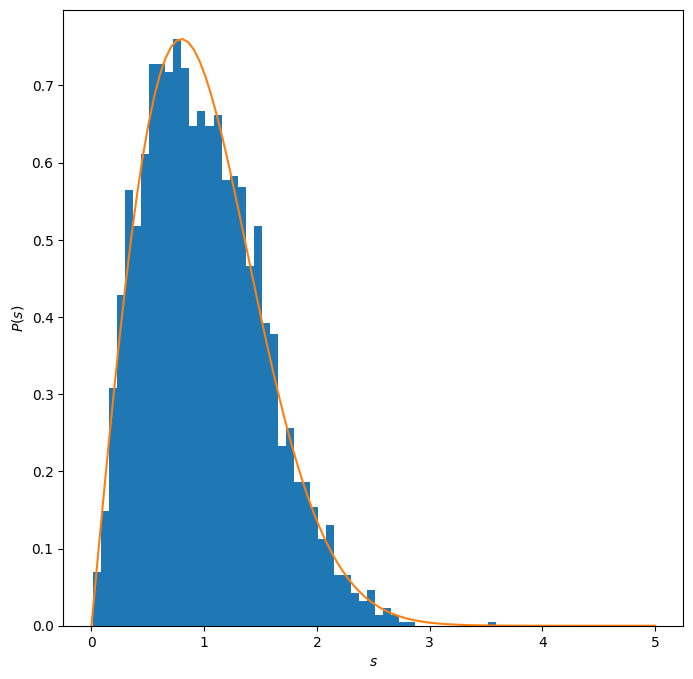

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(spacings, density = True, bins = 50);
srange = np.linspace(0,5,100)
def GOE_prob(s):
  return (np.pi / 2) * s * np.exp(-(np.pi / 4) * s**2)

GOE_probabilities  = [GOE_prob(s) for s in srange]
plt.plot(srange, GOE_probabilities)
plt.ylabel('$P(s)$')
plt.xlabel('$s$')

Now let us look at the spectrum of a large $NxN$ random matrix, again drawn from the GOE ensemble. We will see how the distrubution of level spacings agrees remarkably well with the 2x2 answer! Pick $N = 3000$, create a $NxN$ random GOE matrix and obtain its eigenvalues.

(c) Plot the histogram of eigenvalues (i.e. DOS). This should display the Wigner semicircle shape. [2pts]

(d) Choose the middle third of the eigenvalues, obtain the spacings between the eigenvalues and divide by the average spacing so that $\langle s \rangle$ =1. Plot a normalized histogram of these spacings, and superpose the Wigner surmise prediction obtain for $2x2$ matrices. [2pts]

**1c.**

In [ ]:
N = 3000
G = np.random.normal(size = (N,N))
H = (G + G.T) / np.sqrt(N)
eigvals = np.linalg.eigvalsh(H)

Text(0, 0.5, '$P(\\epsilon)$')

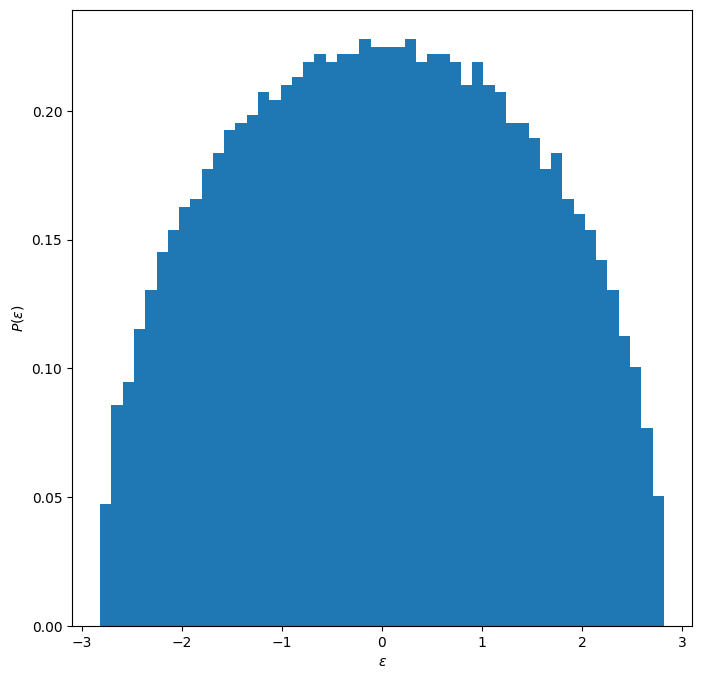

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(eigvals, bins = 50, density = True);
plt.xlabel('$\epsilon$')
plt.ylabel('$P(\epsilon)$')

**1d.**

Text(0.5, 0, '$s$')

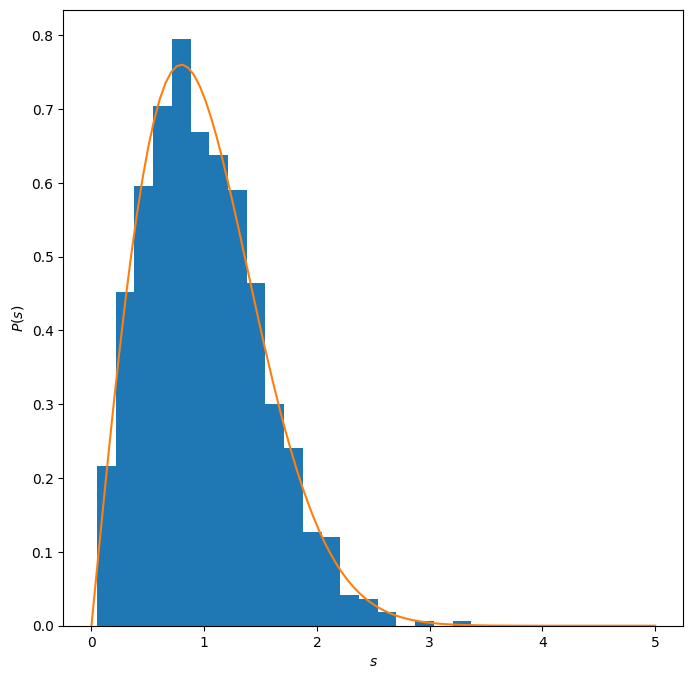

In [ ]:
plt.figure(figsize=(8,8))
spacings = np.array([eigvals[i+1] - eigvals[i] for i in range(N//3, 2*N//3)])
spacings /= np.average(spacings)

plt.hist(spacings, density = True, bins = 20);

srange = np.linspace(0,5,100)
def GOE_prob(s):
  return (np.pi / 2) * s * np.exp(-(np.pi / 4) * s**2)

GOE_probabilities  = [GOE_prob(s) for s in srange]
plt.plot(srange, GOE_probabilities)
plt.ylabel('$P(s)$')
plt.xlabel('$s$')


Good agreement!

One annoying technicality in all studies of RMT is the need for `spectral unfolding'. We want to compare energy spacing distributions across different models to search for universality. This requires specific details to be removed (such as dependences on system size, energy density etc.), so that the average level spacing is unity. In practice, prescriptions for unfolding can be quite ad-hoc and results sometimes end up being sensitive to the prescription used. We used a "poor man's" unfolding prescription above when we divided by $\langle s \rangle$, but there are entire PhD theses written on unfolding prescriptions!



To circumvent this issue, it is often convenient to use a different measure called the r-ratio, introduced by Oganesyan and Huse, which is the ratio of consecutive energy-level spacings:
$\tilde{r_n} = \frac{{\rm min} \{s_n, s_{n-1}\}}{{\rm max} \{s_n, s_{n-1}\}} $. By taking the ratio of consecutive spacings, overall scales get modded out.

Useful Reference: Atas et. al., "The distribution of the ratio of consecutive level spacings in random matrix ensembles", https://arxiv.org/pdf/1212.5611.pdf.

(e) Obtain the distributions of $\tilde{r}$ for 3x3 and $NxN$ random matrices drawn from the GOE ensemble, and compare against the analytic prediction in Atas et. al. Note that you need 3x3 matrices because you need two spacings and hence three eigenvalues. [5pts]


(f) Analytically derive the distributions of level spacings for 2x2 GOE random matrices (i.e. the Wigner surmise). Hint: the entries of the matrix are drawn from Gaussian normal distributions, and the distributions of eigenvalues can be obtained via a suitable change of basis and the accompanying Jacobian. [5pts]

(g) Following Atas et. al., analytically derive the distribution of $\tilde{r}$ for the GOE ensemble (this is a generalization of the Wigner surmise which requires you to consider 3x3 matrices). [5pts]




**1e.**

Text(0, 0.5, '$P(r)$')

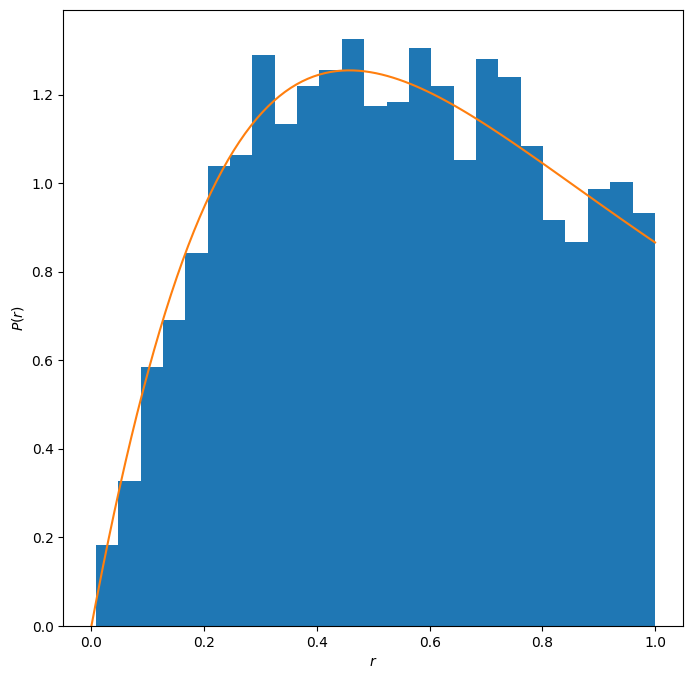

In [ ]:
plt.figure(figsize=(8,8))

def r_ratio_3x3():
  G = np.random.normal(size = (3,3))
  H = (G + G.T) / np.sqrt(3)

  eigvals = np.linalg.eigvalsh(H)
  spacing = [eigvals[1] - eigvals[0], eigvals[2] - eigvals[1]]
  return min(spacing) / max(spacing)


GOE_ratio_3x3 = [r_ratio_3x3() for i in range(5000)]
plt.hist(GOE_ratio_3x3, bins = 25, density = True)

rrange = np.linspace(0,1,100)
def func(r):
  return 2 * (27 / 8) * ( (r + r**2) / ((1 + r + r**2)**(5/2)) )

plt.plot(rrange, [func(r) for r in rrange])
plt.xlabel('$r$')
plt.ylabel('$P(r)$')

**1f.**

Since we have a 2x2 random symmetric matrix, we know the probability distribution of each of the elements. In order to obtain the probability distribution for the level spacing, we need to sum over every possible value of the matrix elements, weighted by their probability, subject to the constraint that they produce a given level spacing $s$. And then this is normalized. This amounts to integrating over the joint probability distribution of all $a,b,c$ where $a,b,c$ are the matrix elements, as long as a given $a,b,c$ produces an $s$. This amounts to a delta function in the integral.

Given: $H = \begin{pmatrix} a & b \\ b & c \end{pmatrix}$

$P(s) = \frac{1}{N}\int da\: db\: dc\:  \delta(\sqrt{a^2 -2ac+c^2+4b^2} - s)e^{-\frac{1}{2}(a^2+c^2+2b^2)} \\
r \cos\theta = a-c,\: r\sin\theta = 2b, \: \phi = a+c \\
a = \frac{r \cos \theta + \phi}{2},\: b = \frac{r \sin \theta}{2}, \: c = \frac{\phi - r \cos \theta}{2}\\
J = \begin{bmatrix} (\cos \theta )/2 & -r \sin \theta / 2 & 1/2 \\ (\sin \theta )/2 & r \cos \theta/2 & 0 \\ -(\cos \theta )/2 & r \sin \theta / 2 & 1/2 \end{bmatrix} \\
\text{det} J = r / 4 \\
P(s) = \frac{1}{N}\int \frac{r}{4}dr\: d\theta \: d\phi\:  \delta(\sqrt{r^2 \cos ^2 \theta +r^2\sin^2 \theta} - s)\exp{\left[-\frac{1}{2}(\frac{1}{4}(r\cos \theta + \phi)^2+\frac{1}{4}(-r\cos \theta + \phi)^2+\frac{1}{2}(r\sin \theta)^2) \right] } \\
= \frac{1}{N}\int \frac{r}{4}dr\: d\theta \: d\phi\:  \delta(\sqrt{r^2 \cos ^2 \theta +r^2\sin^2 \theta} - s)\exp{\left[-\frac{1}{2}(\frac{1}{4}(r\cos \theta + \phi)^2+\frac{1}{4}(-r\cos \theta + \phi)^2+\frac{1}{2}(r\sin \theta)^2) \right] } \\
= \frac{1}{N}\int \frac{r}{4}dr\: d\theta \: d\phi\:  \delta(\pm r - s)\exp{\left[-\frac{1}{2}(\frac{1}{4}(r\cos \theta + \phi)^2+\frac{1}{4}(-r\cos \theta + \phi)^2+\frac{1}{2}(r\sin \theta)^2) \right] }  \\
= \frac{1}{N}\int \frac{s}{2}d\theta \: d\phi\:  \exp{\left[-\frac{1}{2}(\frac{1}{4}(s\cos \theta + \phi)^2+\frac{1}{4}(-s\cos \theta + \phi)^2+\frac{1}{2}(s\sin \theta)^2) \right] }  \\
= \frac{1}{N}\int \frac{s}{2}d\theta \: d\phi\:  \exp{\left[-\frac{1}{2}(\frac{1}{2} s^2 \cos^2 \theta + \frac{1}{2} \phi^2 + \frac{1}{2}s^2\sin^2\theta) \right] } \\
= \frac{1}{N}\int \frac{s}{2}d\theta \: d\phi\:  \exp{\left[-\frac{1}{4}(s^2  + \phi^2 ) \right] } \\
= \frac{s}{N} e^{-s^2/4}$

I just absorbed all constants into the normalization.

$\int_0^{∞} P(s) ds = \int_0^{∞} \frac{s}{N} e^{-s^2/4} ds \frac{2}{N} = 1$ \\
$P(s) =\frac{s}{2} e^{-s^2/4}$

**1g.**

$P(r) = \int de_1 \: de_2 \: de_3 \: \rho(e_1,e_2,e_3) \delta \left(s - \frac{e_3-e_2}{e_2-e_1} \right) \\
=  \int de_1 \: de_2 \: de_3 \: (e_3-e_2)(e_2-e_1) \exp{\left[ -1 / 2(e_1^2 + e_2^2 + e_3^2) \right]} \delta \left(r - \frac{e_3-e_2}{e_2-e_1} \right) \\
x = e_2 - e_1, \: y = e_3 - e_2 \\
=  \int dx \: dy \: x^2 y (x+y) \exp{\left[ -1 / 2(x^2+y^2) + 1/6(x-y)^2 \right]} \delta \left(rx - y \right) \\
\int dx \: x^4 r (r+1) \exp{\left[ -1 / 2(1+r^2)x^2 + 1/6(1-r)^2x^2 \right]} \\
= N \frac{r(r+1)}{(1+r+r^2)^{5/2}} \\
\int_0^{∞} dr P(r) = N (8 / 27) = 1 \\
P(r) = \frac{27}{8} \frac{r(r+1)}{(1+r+r^2)^{5/2}}$

However, we need the $r̃$ distribution. Note that $r̃ = r \Theta(r - 1) + \frac{1}{r}\Theta(1- r)$. We have $P(r)$. We need $P(1/r)$. This document might be helpful : https://www.math.arizona.edu/~jwatkins/f-transform.pdf.

We need the following formula:  Given a random variable $X$ with pdf $f_X$, and another variable $Y = g(X)$, the pdf of $Y$, $f_Y$ is

$f_Y(y) = f_X(g^{-1}(y))|\frac{d}{dy} g^{-1}(y)|$

The function which we are trying to calculate the inverse of $g(r) = 1/r$. The inverse of this function is $g^{-1}(r) = 1/ r$. Plugging all this into the above, we get after working through it

$ P(1/r) \times \frac{1}{r^2} = P(r)$.

From this, we can get the pdf of $r̃$.

$P(r̃) = \int_0^{\infty} dr \delta(r̃ - r \Theta(r - 1) + \frac{1}{r}\Theta(1- r)) P(r) = \int_0^1 dr \delta(r̃ - \frac{1}{r}) P(r) + \int_1^{\infty} dr \delta (r̃- r)P(r) = $

$s = 1/r, ds = -1/r^2 dr = -s^2 dr$.

$ = \int_1^∞ ds \delta(r̃ - s) \frac{1}{s^2} P(1/s) + \int_1^{\infty} dr \delta (r̃- r)P(r) = \int_1^∞ ds \delta(r̃ - s) P(s) + \int_1^{\infty} dr \delta (r̃- r)P(r) = 2 \Theta(r̃ - 1) P(r̃)$.


An extra note that might be of interest (credit to Cheryne Jonay and Nick O'Dea):


*(A sketch of the key steps of the proof is that $H = O^T \Lambda O$, so $dH = dO^T \Lambda O + O^T d\Lambda O + O^T \Lambda dO$. Defining a metric $g$ as the coefficients of $Tr[dH dH]$ allows one to find the Jacobian $J$ resulting from changing from the basis of matrix elements of $H$ to that described by the eigenvectors and eigenvalues of $H$, as metrics obey $J = \sqrt{\det{g'}/\det{g}}$ on changing from unprimed to primed coordinates.

Note that $O dH O^T = OdO^T \Lambda + d \Lambda + \Lambda dO O^T = d\Lambda + [\Lambda, dO O^T]$, where I've used $O^T O = I$ to derive $dO^T O = - O^T dO$.

Then $Tr[dH dH] = Tr[O^T dH O O^T dH O] = Tr[(d\Lambda + [\Lambda, dO O^T])(d\Lambda + [\Lambda, dO O^T])]$.

Since $Tr[A[B,C]] = Tr[B[C,A]]$ and $[d\Lambda , \Lambda] = 0$, the cross terms vanish, leaving us with

$Tr[dH dH] = Tr[d\Lambda^2] + Tr[[\Lambda, dO O^T]^2]$

This has a nice analogy in terms of polar coordinates: the $d\Lambda^2$ can be thought  of as a radial component, and the $Tr[[\Lambda, dO O^T]^2]$ as a solid angle. The analogy is important because it gives a nice visual of the eigenvalue repulsion: If we think of the entries of H in terms of these new (eigenvalue and eigenvector) coordinates, we immediately see that if any $e_i=e_j$ for $i\neq j$, we will have a circle of vanishing radius. On the other hand, for $r_{ij}=e_i-e_j\neq 0$, we can trace out a shell of width $r_{ij}$ in an $N$-dimensional space.

Finally, by expressing $dO O^T$ in terms of the generators of rotation $Y$ of $SO(N)$ via $O = e^{iY}$, which are generalizations of the $\sigma^y$ Pauli, the trace of the commutator at the end can be explicitly written out in terms of the $dY$ and the eigenvalues. Taking the determinant of the resulting (diagonal) metric and taking the square root yields the eigenvalue repulsion factors of $\propto \prod_{i,j\;|\; N\geq i>j \geq 1} |e_i-e_j|$, and one can simply integrate out the $dY$ terms to get the eigenvalue distribution alone.

Note that the same can be repeated for the GUE, only that we use the trick $U^{\dagger}U=1$ to derive $dU^{\dagger} U = -U^{\dagger} dU$, and the generators would be those for $U(N)$ (i.e. Hermitian matrices). The resulting level repulsion has an additional power arising from the additional generators and hence goes like $\propto \prod_{i,j\;|\; N\geq i>j \geq 1} |e_i-e_j|^2$.)

## Question 2: Diagonalizing with symmetries [20 pts] (+ Bonus 20pts)##

When a Hamiltonian has a symmetry $S$ so that $[H, S]=0$, it can often help with diagonalization to take this symmetry into account. Because $H$ and $S$ can be simultaneously diagonalized, $H$ is block diagonal in the basis of eigenstates of $S$. Because these block sizes are smaller than the size of the full Hilbert space, diagonalizing the blocks separately can substantially speed up diagonalization. Remember that (dense) diagonalization scales with matrix size as $N^3$. Thus, if we can divide the Hamiltonian of size $2^L$ into (say) two equal blocks of size $(2^L)/2$, each of the two blocks will be diagonalized 8 times faster, for a total factor of 4 speedup in the diagonalization.

The block diagonalization is only useful if the symmetries $S$ are "simple", so that the eigenstates of $S$ can be obtained without doing an explicit diagonalization for $S$. For example, when $S = \prod_i Z_i$, we know the eigenstates of $S$ are just product states in the $Z$ basis. Doing a dense diagonalization of $S$ is not useful numerically, because it is just as expensive as doing full diagonalization on $H$.

To block diagonalize the Hamiltonian in the eigenbasis of $S$, one obtains the eigenvalues of $S$ (again, these are often known analytically): $\{s_1, s_2, \cdots s_n\}$. We then construct projectors $P_\alpha$ whose columns are the eigenvectors of $S$ with a given eigenvalue $s_\alpha$. This matrix has dimension $2^L x d_\alpha$, where $d_\alpha$ is the number of eigenstates of $S$ with eigenvalue $s_\alpha$. Finally, $H_\alpha = P^T_\alpha  H P_\alpha$ has dimension $d_\alpha x d_\alpha$ and can be diagonalized more efficiently. Finally, note that $H$ and $P_\alpha$ are sparse matrices in most cases of interest, so $H_\alpha$ can be constructed using sparse multiplication.  

Of course, when $H$ has multiple mutually commuting symmetries, the blocks can be chosen to take all of these into account.

Useful reference: http://physics.bu.edu/~sandvik/nccu/l2.pdf



Choose $L = 8$.


(a) Pick $S = \prod_{i=1}^L Z_i$. This has eigenvalues $\{+1, -1\}$. Construct $P_+$ and $P_-$ without doing dense diagonalization. Note that you can do this by explictly looping through all $2^L$ $z$ basis states in binary, and computing $S$ for each of these. However, it is even faster to directly construct the diagonal matrix $S$ using sparse multiplication. Then you can obtain the diagonal entries using S.diagonal(), and search for the indices where the entries are +1 or -1 using np.where(). [2pts]

(b) Pick $S = \sum_i Z_i$. What are the possible eigenvalues $s_\alpha$ of $S$? Construct $P_\alpha$ for each of these. Once again, looking at the diagonal entries of $S$ may be useful. [3pts]

(c) Pick $S = \prod_i X_i$. Construct $P_+$ and $P_-$ without doing dense diagonalization. [5pts]

(d) Pick $S$ = spatial inversion symmetry. Construct $P_+$ and $P_-$. [10pts]

(e) Bonus: Pick $S$ = discrete translation symmetry by a lattice constant. What are the allowed eigenvalues? Construct $P_\alpha$ for each of these. The Sandvik link above will be useful. [20pts]  

**2a.**

We'll do this 3 ways. First, since this is an operator which takes on only $\pm 1$ eigenvalues, the projectors can be represented as $P_{\pm} = \frac{1 \pm \prod_{i=1}^L Z_i}{2}$. The columns of this matrix are the +1 eigenvectors of $P$ which will form the basis of the subspace that we project into.

In [ ]:
from functools import reduce


def P_ZProd(L, sector = 1): #1 is the plus sector, -1 is the minus sector
  s0_list, sx_list,sy_list,sz_list = gen_s0sxsysz(L)
  op = reduce(lambda x, y: x * y, sz_list)
  P = 0.5 * (sparse.identity(2**L) + sector * op) # We will want only the columns of this matrix which contain a nonzero element.
  P_reduced = P[:, P.getnnz(axis=0) > 0]
  return P_reduced


P_ZProd(4,1).todense()

matrix([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]])

The second way to do this is to construct the operator and just look for where the +1 elements are on the diagonal.

In [ ]:
def P_ZProd(L, sector = 1): #1 is the plus sector, -1 is the minus sector
  s0_list, sx_list,sy_list,sz_list = gen_s0sxsysz(L)
  op = reduce(lambda x, y: x * y, sz_list)
  diagonal = op.diagonal()
  idx = np.where(diagonal == sector)[0]
  P = op[:, idx]
  return P


P_ZProd(4,1).todense()


matrix([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]])

The third way is by direct evaluation of the operator over the basis states. This can be accomplished by summing the digits, mod 2, of the bit string representation of the basis state. If the result is 0(1), then it is a +1(-1) eigenstate of the operator.

In [ ]:
def P_ZProd(L, sector = 1): #1 is the plus sector, -1 is the minus sector
  basis = []
  sector = abs((sector - 1) // 2)
  for i in range(2**L):
    if sum(int(digit) for digit in bin(i)[2:]) % 2 == sector:
      basis.append(i)
  P = sparse.eye(2**L, format='csr')[basis].T
  return P

P_ZProd(4).todense()

matrix([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]])

**2b.**

This operator has eigenvalues $L, L-2, \ldots -L + 2, -L$. In the binary representation of a $Z$ basis state, the sum of all the digits is related to the total $Z$ spin. The sum of all the digits is the number of down spins $N_↓$ in the basis state. The total $Z$ spin of a basis state is then $L - 2 N_↓$.

In [ ]:
def P_totalZ(L, sector = 0): # Enter the total Z spin desired
  basis = []
  for i in range(2**L):
    Nd = sum(int(digit) for digit in bin(i)[2:])
    if L - 2*Nd == sector:
      basis.append(i)
  P = sparse.eye(2**L, format='csr')[basis].T
  return P

P_totalZ(4).todense()

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

This can also be accomplished by constructing the operator and searching for the diagonal elements where the desired eigenvalues reside.

In [ ]:
def P_ZProd(L, sector = 0): # Enter the total Z spin desired
  s0_list, sx_list,sy_list,sz_list = gen_s0sxsysz(L)
  op = sum(sz_list)
  diagonal = op.diagonal()
  idx = np.where(diagonal == sector)[0]
  P = sparse.eye(2**L, format='csr')[idx].T
  return P


P_ZProd(4,0).todense()


matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

**2c.**

The action of this operator is to flip every spin in the state. The states which are eigenstates of this operator are the "cat states." These are states which are superpositions of a $Z$ basis state and the state created by flipping every spin of that state, e.g. $|{0010}\rangle + |{1101}⟩$. Furthermore, in a $2^L$ system, given the a $Z$ basis state and its integer representation $i$, the integer representation of the cat state pair is $(2^L - 1) - i$. This allows us to construct the projectors.

Said more simply, the action of $P$ will take a non-zero element of a vector located at index $i$ and place it in the $(2^L - 1) - i$th index. The eigenvectors have a simple form. They are just the vectors which are invariant under mirroring about the central index.

In [ ]:
def P_Xprod(L, sector = 1): #1 is the plus sector, -1 is the minus sector
  P = sparse.csr_matrix((2**L, 2**(L-1)))
  idx = np.arange(2**(L - 1))
  P[idx, idx] = 1 / np.sqrt(2)
  P[2**L - 1 - idx, idx] = sector * 1 / np.sqrt(2)
  return P



**2d.**

I find that the easiest way to do this is through manipulation of the bitstring representations. The eigenstates can be found by the following. If a $Z$ basis state is identical under reversing the bitstring, it is an inversion eigenstate. If not, the state can be added to its reversed pair. This superposition is an eigenstate. These are all the eigenstates of the symmetric inversion operator. The antisymmetric inversion eigenstates are the same superpositions from the plus sector but with a minus sign.

In [ ]:
def P_inv(L, sector = 1):
  P = []
  for i in range(2**L):
    chain = L - len(bin(i)[2:])
    j = int('0b' + bin(i)[2:][::-1] + chain * '0',2)
    if j < i:
      continue
    if i != j:
      state = sparse.csr_matrix((2**L,1))
      state[i] = 1 / np.sqrt(2)
      state[j] = sector * 1 / np.sqrt(2)
      P.append(state)
    elif sector == 1:
      state = sparse.csr_matrix((2**L,1))
      state[i] = 1
      P.append(state)
  return sparse.hstack(P)

P_inv(4, 1).todense()


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


matrix([[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.70710678, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.70710678, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.70710678, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.70710678, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.    

**2e.**

Credit to Cheryne Jonay and Nick O'Dea for this solution.

In [ ]:
#gen_sym_translation constructs sparse, rectangular projectors for different momenta sectors.
#Works for any S.

def gen_sym_translation(ind, L,S):
  tol = .1/L
  SSHS = int(np.round(2*S+1,1))
  base = SSHS

  #I am constructing values, i-indices, and j-indices.
  #These allow the construction of sparse projectors.
  ktval = [[] for i in range(L)]
  ktjind = [[] for i in range(L)]
  ktiind = [[] for i in range(L)]
  kcounter = [0 for i in range(L)]

  temind = 0
  counter = 0
  for n in ind:
    #print('n is' + f'{n}')
    b = np.base_repr(n, base = SSHS).zfill(L)
    ind = [n]
    for d in range(1, L+1):
      #Constructing translated product states
      indx = int(b[d:]+b[:d], SSHS)
      ind.append(indx)

      #Some product states are translations of another.
      #The following if statement eliminates redundancies by selecting
      #a "representative" product state before proceeding.
      if indx < n:
        break
      if indx == n:
        for k in range(0, L):
          tmp = k*d/L
          if np.abs(np.round(tmp) - tmp) < tol:
                #^Ensure that the momentum phases can "wrap around" between site L-1 and 0.
                #If k is not 0 or pi, we can just use the translated states found earlier.
                ktjind[k].append(ind[:-1])
                ktiind[k].append([kcounter[k]]*(d))
                kcounter[k] = kcounter[k] + 1
                ktval[k].append((np.exp(2 * np.pi * 1j * k/L) ** np.arange(d))/np.sqrt(d))
        break

  #Now constructing sparse matrices using the sets of (value, i, j) from above.
  #If a given symmetry sector would have 0 eigenvectors in it, I return a row matrix filled
  #with 0s in its place to avoid exceptions.
  slist = []
  for k in range(L):
      try:
        tem = sparse.csr_matrix((np.concatenate(ktval[k]), (np.concatenate(ktiind[k]), np.concatenate(ktjind[k]))), shape=(kcounter[k], SSHS**L))
      except:
        tem = sparse.csr_matrix((1, SSHS**L))
      slist.append(tem)

  return(slist)



## Question 3: $J_1$-$J_2$ Heisenberg model [30 pts]##

A class of models we'll use very often in this course are perturbations of the integrable XXZ chain: $H = J \sum_i (\sigma_i^x\sigma_{i+1}^x + \sigma_i^y\sigma_{i+1}^y + \Delta_z\sigma_i^z\sigma_{i+1}^z)$. The model is integrable for all $\Delta_z$, but $\Delta_z = 1$ has $SU(2)$ symmetry which complicates the ETH analysis. For simplicity, set $\Delta_z =0.5$.
One integrability breaking perturbation is the addition of second-neighbor hoppings/interactions:
$$H = J \sum_i (\sigma_i^x\sigma_{i+1}^x + \sigma_i^y\sigma_{i+1}^y + \Delta_z \sigma_i^z\sigma_{i+1}^z) + J_2 \sum_i (\sigma_i^x\sigma_{i+2}^x + \sigma_i^y\sigma_{i+2}^y + \Delta_z \sigma_i^z\sigma_{i+2}^z).$$ Note that this model has an additional $U(1)$ symmetry corresponding to conservation of total $z$ component of spin, $Q = S^z_{\rm tot} = \sum_i \sigma_i^z$.  The Hamiltonian in the $z$ basis is block diagonal in the different sectors of $Q$, since it cannot mix between states with different $q$ values.


We will take $Q$ into account in the analysis below. However, to simplify the numerical analysis, you can work with open boundary conditions (so that you do not have translation symmetry). You may also choose to add a small boundary term $0.2 \sigma_1^z$; this will not change the bulk properties, but breaks inversion symmetry so your analysis is not complicated by inversion symmetry.

We will compare two Hamiltonians:
$J_2 = 0$ which is integrable and
$J_2 = 1$ which is non-integrable. The parts below will require you to analyse various eigenspectrum properties for both values of $J_2$ and $L = 8, 10, 12, 14$. I suggest diagonalizing once for each parameter choice (take the $Q$ symmetry into account) and then performing the different analyses below, rather than diagonalizing separately each time.  


(a) Consider the entire (sorted) eigenvalue spectrum for $H$. You can obtain this by merging the eigenvalues from each sector into a single list, and sorting this list. Consider the middle third of the sorted list of eigenvalues (corresponding to infinite temperature) and obtain and plot the distribution of eigenenergy spacings for both values of $J_2$ and the different $L$ values. Do you notice a difference between the integrable and non-integrable cases? [10pts]

(b) Repeat the analysis from (a), but now only consider eigenvalues within the $Q=0$ symmetry sector. What changed? [5pts]

(c) Comment on the results from (a) and (b), and discuss the importance of symmetries in performing analyses of eigenvalue spacings. [5pts]

Recall the ETH ansatz: $O_{\alpha \beta} = O(E)\delta_{\alpha \beta} + R_{\alpha\beta} e^{S(E)/2}f(E,\omega)$, where $E= \frac{E_\alpha+E_\beta}{2}$ and $\omega = E_\beta - E_\alpha$, and O(E) and $f(E, \omega)$ are smooth functions of $E, \omega$, $R_{\alpha, \beta}$ is a Gaussian random variable.

The off-diagonal ETH ansatz follows from RMT. For a $N$ dimensional Gaussian random matrix, the eigenvectors $|\alpha\rangle$ look like random gaussian vectors. The eigenvectors have unit norm, which imposes that $\alpha_i \sim r_i /\sqrt{N}$, with $r_i$ a random Gaussian variable and $\alpha_i$ is the $i$th entry of $|\alpha\rangle$ in the computational basis. If $|\alpha\rangle$ is a random vector, so is $O|\alpha\rangle$, and the overlap of $O|\alpha\rangle$ with another random vector $|\beta\rangle$ typically scales as $r/\sqrt{N}$ (similar to scaling of $\alpha_i$, which is of course the overlap of the random vector $\alpha$ with the computational basis state $i$). This RMT expection shows up in the $R_{\alpha\beta} e^{-S(E)/2}$ part of the ETH ansatz, as $e^{-S(E)/2} \sim 1/\sqrt{N}$ is simply the inverse square root of the Hilbert space dimension at energy $E$. For small enough energy windows ($\Delta E < E_{\rm Thouless}$), the spectrum of a thermalizing Hamiltonian resembles that of a random matrix, and $f(E, \omega)$ is featureless.

We will now perform a crude test of off-diagonal ETH.

(d) Pick the largest system size $L=14$ and work within the $S^z_{\rm tot} = 0$ sector. (This is the largest sector corresponding to $\mu = 0$, analogous to working at infinite temperature). Pick the middle 100 eigenstates in the sector, and obtain $O_{\alpha \beta}$ for each pair of eigenstates within these 1000 states (this will give you 100 choose 2 = 4950 $O_{\alpha \beta}$ values). You can pick $O = Z_{L/2}$.  Histogram these matrix elements for both values of $J_2$. Do the distributions look Gaussian? This is testing the prediction that $R_{\alpha \beta}$ in the ETH ansatz is a random Gaussian variable.
Discuss the differences between the two values of $J_2$. [10pts]

An interesting paper and very readable paper that explores off-diagonal across an MBL phase transition is: https://arxiv.org/abs/1607.01012


Note: since we are only performing this analysis for a fixed system size, we are not checking for the $e^{-S/2}$ dependence; likewise, $f$ is assumed to be featureless within the small energy window we have picked.  Of course, you are welcome to explore there features as well.



**3a.**

In [ ]:
def Ham_op(L):
  s0_list, sx_list,sy_list,sz_list = gen_s0sxsysz(L)

  delta = 0.5
  J1 = 1
  J2 = 1

  Ham = 0.2 * sz_list[0] #I Inversion symmetry breaking boundary field
  HamJ2 = 0.2 * sz_list[0]

  for i in range(L):
    if i + 1 < L:
      Ham += J1 * (sx_list[i] * sx_list[i+1] + sy_list[i] * sy_list[i+1] + delta * sz_list[i] * sz_list[i+1])
      HamJ2 += J1 * (sx_list[i] * sx_list[i+1] + sy_list[i] * sy_list[i+1] + delta * sz_list[i] * sz_list[i+1])
    if i + 2 < L:
      HamJ2 += J2 * (sx_list[i] * sx_list[i+2] + sy_list[i] * sy_list[i+2] + delta * sz_list[i] * sz_list[i+2])

  evals = []
  evalsJ2 = []
  for i in range(-L,L+1,2):
    Q = P_totalZ(L,i)
    Ham_sector = Q.T * Ham * Q
    HamJ2_sector = Q.T * HamJ2 * Q

    eigvals = np.linalg.eigvalsh(Ham_sector.toarray()).tolist()
    eigvalsJ2 = np.linalg.eigvalsh(HamJ2_sector.toarray()).tolist()

    eigvals.sort()
    eigvalsJ2.sort()

    evals.append(eigvals)
    evalsJ2.append(eigvalsJ2)



  return np.concatenate(evals), np.concatenate(evalsJ2)

evals_L8, evals_L8_J2 = Ham_op(8)


In [ ]:
evals_L8, evals_L8_J2 = Ham_op(8)
evals_L10, evals_L10_J2 = Ham_op(10)
evals_L12, evals_L12_J2 = Ham_op(12)
evals_L14, evals_L14_J2 = Ham_op(14)

In [ ]:
def get_spacings(evals):
  N = len(evals)
  evals.sort()
  spacings = evals[N//3+1:2*N//3+1] - evals[N//3:2*N//3]
  spacings /= np.average(spacings)
  return spacings

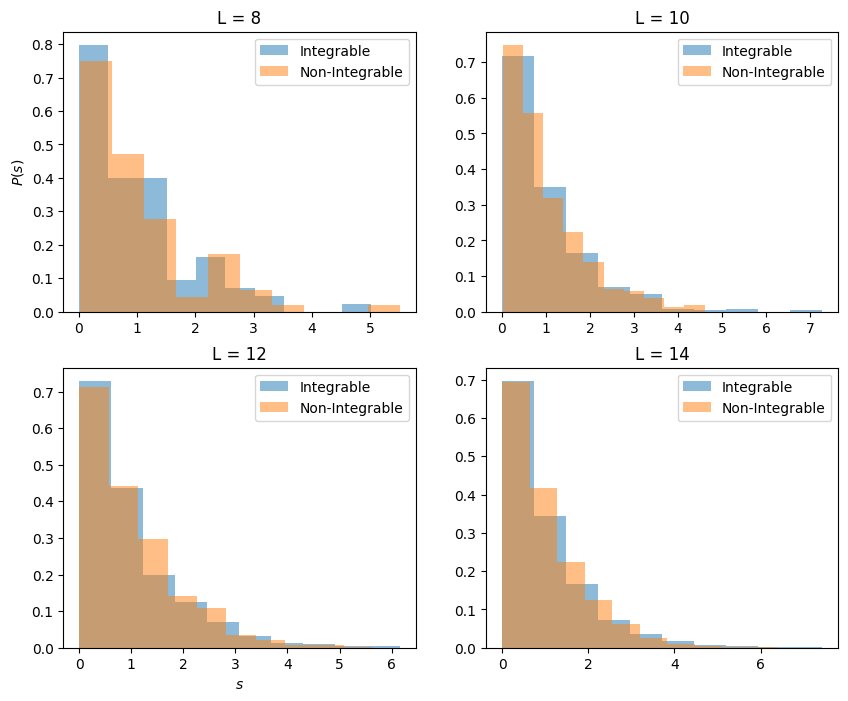

In [ ]:
fig, ax = plt.subplots(2,2, dpi = 100)
fig.set_figwidth(10)
fig.set_figheight(8)

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

ax1.set_title('L = 8')
ax1.hist(get_spacings(evals_L8), alpha = 0.5, label = 'Integrable', density = True);
ax1.hist(get_spacings(evals_L8_J2), alpha = 0.5, label = 'Non-Integrable', density = True);
ax1.set_ylabel('$P(s)$')
ax1.legend();

ax2.set_title('L = 10')
ax2.hist(get_spacings(evals_L10), alpha = 0.5, label = 'Integrable', density = True);
ax2.hist(get_spacings(evals_L10_J2), alpha = 0.5, label = 'Non-Integrable', density = True);
ax2.legend();

ax3.set_title('L = 12')
ax3.hist(get_spacings(evals_L12), alpha = 0.5, label = 'Integrable', density = True);
ax3.hist(get_spacings(evals_L12_J2), alpha = 0.5, label = 'Non-Integrable', density = True);
ax3.set_xlabel('$s$')
ax3.legend();

ax4.set_title('L = 14')
ax4.hist(get_spacings(evals_L14), alpha = 0.5, label = 'Integrable', density = True);
ax4.hist(get_spacings(evals_L14_J2), alpha = 0.5, label = 'Non-Integrable', density = True);
ax4.legend();

Without accounting for symmetries the non integrable and the integrable cases look more or less the same!

**3b.**

In [ ]:
def Ham_op_Q0(L):
  s0_list, sx_list,sy_list,sz_list = gen_s0sxsysz(L)

  delta = 0.5
  J1 = 1
  J2 = 1

  Ham = 0.2 * sz_list[0] #I Inversion symmetry breaking boundary field
  HamJ2 = 0.2 * sz_list[0]

  for i in range(L):
    if i + 1 < L:
      Ham += J1 * (sx_list[i] * sx_list[i+1] + sy_list[i] * sy_list[i+1] + delta * sz_list[i] * sz_list[i+1])
      HamJ2 += J1 * (sx_list[i] * sx_list[i+1] + sy_list[i] * sy_list[i+1] + delta * sz_list[i] * sz_list[i+1])
    if i + 2 < L:
      HamJ2 += J2 * (sx_list[i] * sx_list[i+2] + sy_list[i] * sy_list[i+2] + delta * sz_list[i] * sz_list[i+2])


  Q = P_totalZ(L,0)
  Ham_sector = Q.T * Ham * Q
  HamJ2_sector = Q.T * HamJ2 * Q

  eigvals = np.linalg.eigvalsh(Ham_sector.toarray())
  eigvalsJ2 = np.linalg.eigvalsh(HamJ2_sector.toarray())


  return eigvals, eigvalsJ2

evals_L8_Q0, evals_L8_J2_Q0 = Ham_op_Q0(8)


In [ ]:
evals_L8_Q0, evals_L8_J2_Q0 = Ham_op_Q0(8)
evals_L10_Q0, evals_L10_J2_Q0 = Ham_op_Q0(10)
evals_L12_Q0, evals_L12_J2_Q0 = Ham_op_Q0(12)
evals_L14_Q0, evals_L14_J2_Q0 = Ham_op_Q0(14)

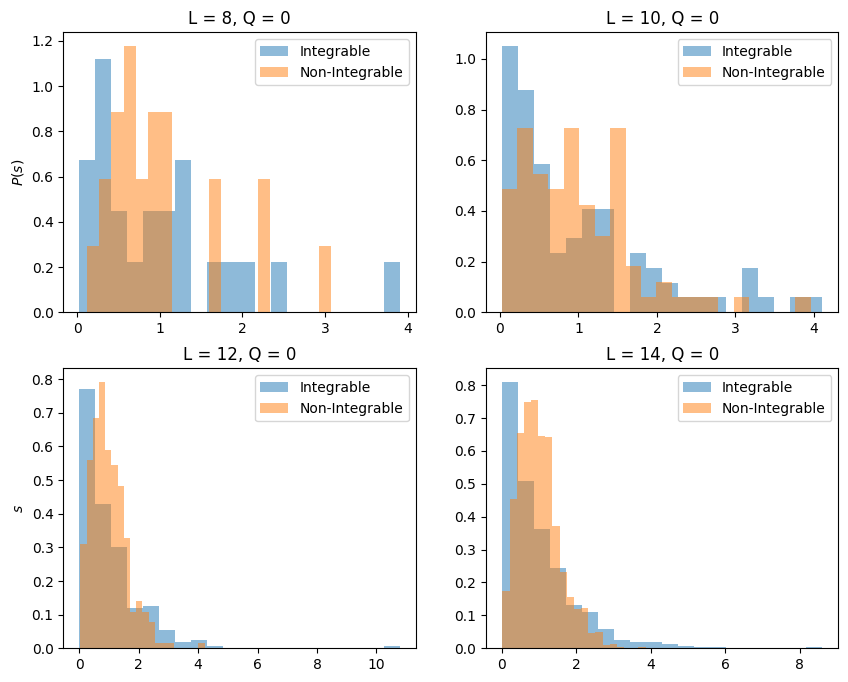

In [ ]:
fig, ax = plt.subplots(2,2, dpi = 100)
fig.set_figwidth(10)
fig.set_figheight(8)

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

ax1.set_title('L = 8, Q = 0')
ax1.hist(get_spacings(evals_L8_Q0), alpha = 0.5, label = 'Integrable', density = True, bins = 20);
ax1.hist(get_spacings(evals_L8_J2_Q0), alpha = 0.5, label = 'Non-Integrable', density = True, bins = 20);
ax1.legend();
ax1.set_ylabel('$P(s)$')

ax2.set_title('L = 10, Q = 0')
ax2.hist(get_spacings(evals_L10_Q0), alpha = 0.5, label = 'Integrable', density = True, bins = 20);
ax2.hist(get_spacings(evals_L10_J2_Q0), alpha = 0.5, label = 'Non-Integrable', density = True, bins = 20);
ax2.legend();

ax3.set_title('L = 12, Q = 0')
ax3.hist(get_spacings(evals_L12_Q0), alpha = 0.5, label = 'Integrable', density = True, bins = 20);
ax3.hist(get_spacings(evals_L12_J2_Q0), alpha = 0.5, label = 'Non-Integrable', density = True, bins = 20);
ax3.legend();
ax3.set_ylabel('$s$')

ax4.set_title('L = 14, Q = 0')
ax4.hist(get_spacings(evals_L14_Q0), alpha = 0.5, label = 'Integrable', density = True, bins = 20);
ax4.hist(get_spacings(evals_L14_J2_Q0), alpha = 0.5, label = 'Non-Integrable', density = True, bins = 20);
ax4.legend();

Now we can see the difference between the Poissonian and RMT statistics in the level spacings.

**3c.**

Symmetries block-diagonalize Hamiltonians, and there is only repulsion within blocks, not between them. Thus, to see the predictions of RMT in the level repulsion, we need to look within symmetry sectors of the Hamiltonian. Looking in several symmetry sectors at once will obfuscate the repulsion as it did in a).
We note that the importance of going into symmetry sectors is because we're studying local (nearest neighbour) level spacing statistics. There exist level spacing diagnostics that probe all length/energy scales. A common example is the spectral form factor, $K(t)= \sum_{n,m}e^{-i(E_n-E_m)t}$. Here the level repulsion is captured as a linear ramp (in $t$) for a specified time range (when the energies are neither too far apart, nor too close). This linenar ramp shows up whether we are in symmetry sectors or not. (Cheryne Jonay & Nick O'Dea)

**3d.**

In [ ]:
L = 14
s0_list, sx_list,sy_list,sz_list = gen_s0sxsysz(L)

delta = 0.5
J1 = 1
J2 = 1

Ham = 0.2 * sz_list[0] #I Inversion symmetry breaking boundary field
HamJ2 = 0.2 * sz_list[0]

for i in range(L):
  if i + 1 < L:
    Ham += J1 * (sx_list[i] * sx_list[i+1] + sy_list[i] * sy_list[i+1] + delta * sz_list[i] * sz_list[i+1])
    HamJ2 += J1 * (sx_list[i] * sx_list[i+1] + sy_list[i] * sy_list[i+1] + delta * sz_list[i] * sz_list[i+1])
  if i + 2 < L:
    HamJ2 += J2 * (sx_list[i] * sx_list[i+2] + sy_list[i] * sy_list[i+2] + delta * sz_list[i] * sz_list[i+2])


Q = P_totalZ(L,0)
Ham_sector = Q.T * Ham * Q
HamJ2_sector = Q.T * HamJ2 * Q


evals, eigvecs = np.linalg.eigh(Ham_sector.todense())
evalsJ2, eigvecsJ2 = np.linalg.eigh(HamJ2_sector.todense())

In [ ]:
eigvecs.shape

(3432, 3432)

In [ ]:
O = Q.T * sz_list[L//2] * Q
eigvecs_trunc = eigvecs[:,N//2 - 50:N//2 + 50]
eigvecsJ2_trunc = eigvecsJ2[:,N//2 - 50:N//2 + 50]

O_T = np.conj(eigvecs_trunc.T) @ O.dot(eigvecs_trunc)
O_T_J2 = np.conj(eigvecsJ2_trunc.T) @ O.dot(eigvecsJ2_trunc)

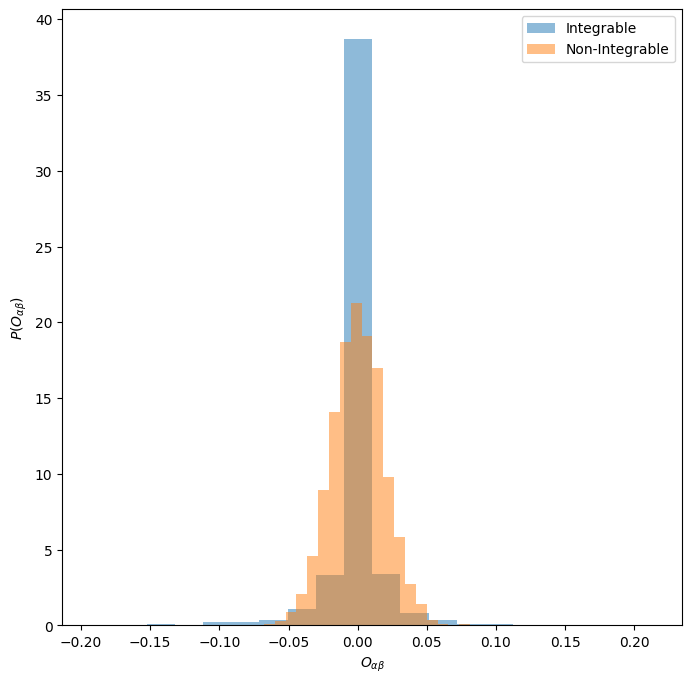

In [ ]:
fig, ax = plt.subplots(1,1, dpi = 100)
fig.set_figwidth(8)
fig.set_figheight(8)

ax1 = plt.subplot(1, 1, 1)
ax1.hist(O_T.real.flatten().tolist()[0], alpha = 0.5, label = 'Integrable', density = True, bins = 20);
ax1.hist(O_T_J2.real.flatten().tolist()[0], alpha = 0.5, label = 'Non-Integrable', density = True, bins = 20);
ax1.set_xlabel('$O_{\\alpha \\beta}$')
ax1.set_ylabel('$P(O_{\\alpha \\beta})$')
ax1.legend();

As $J_2$ breaks integrability, the system becomes much more well described by the ETH. The matrix elements of the operator look Gaussian and random. When $J_2 = 0$, the large number of conservation laws causes the distribution of matrix elements to become much more sharply peaked.